**Stock Prediction** 


Stocks are financial instruments that represent ownership in a company. When individuals or institutions buy shares of a company's stock, they become shareholders and have a claim on the company's assets and earnings. Stocks are traded on stock exchanges, and their prices are influenced by various factors such as company performance, market conditions, and economic trends.

Stock predictions aim to forecast the future price movements of specific stocks. Analysts, traders, and investors use various techniques, including fundamental analysis (evaluating a company's financial health), technical analysis (examining historical price patterns), and sentiment analysis (assessing market sentiment) to make informed predictions. Accurate stock predictions can offer valuable insights for investors to make well-informed decisions about buying, selling, or holding stocks in their portfolios. However, it's important to note that stock prediction is inherently uncertain, and market risks should always be carefully considered.

We are using financial data from Yahoo finance. The data being used in this prediction model is from 2010-01-01 to Current date. 

In [1]:
#liabraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as date  

from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go


In [2]:
start = '2010-01-01'
end = date.datetime.now().strftime('%Y-%m-%d')

In [3]:
end

'2023-07-28'

In [4]:
data = yf.download('AAPL', start, end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-21,194.100006,194.970001,191.229996,191.940002,191.940002,71917800
2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.559998,193.220001,193.220001,45363655


In [6]:
df = data.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [8]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='stock_close'))
fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
fig.show()


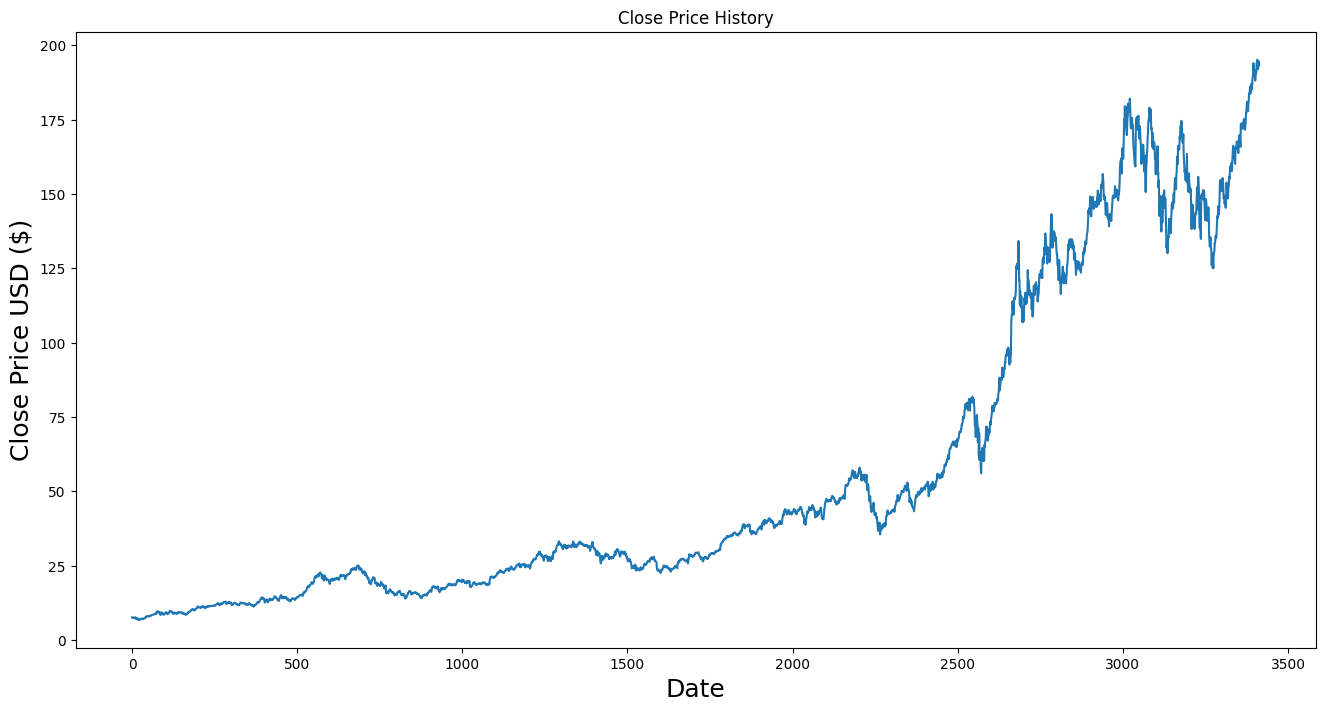

In [10]:
#matplotlib
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


**MA100 and MA200**

In financial markets, "MA100" and "MA200" typically refer to moving averages. Moving averages are popular technical indicators used by traders and investors to smooth out price data and identify trends over a specific period.

MA100: This stands for the 100-day moving average. It is calculated by adding up the closing prices of the asset over the past 100 trading days and then dividing the sum by 100.

MA200: This stands for the 200-day moving average. It is calculated in a similar way to MA100, but using the past 200 trading days instead.

When the MA100 crosses above the MA200, it is called a "golden cross," signaling a potentially strong bullish trend. On the other hand, if the MA100 crosses below the MA200, it is referred to as a "death cross," indicating a potentially strong bearish trend.

If the MA100 is greater than the MA200, it suggests that the recent price action is stronger, and the asset is potentially in a bullish trend.

If the MA100 is lower than the MA200, it indicates weaker recent price performance and a potential bearish trend

In [181]:
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='stock_close'))
fig.add_trace(go.Scatter(x=df['Date'], y=ma100, name='MA100'))
fig.add_trace(go.Scatter(x=df['Date'], y=ma200, name='MA200'))
fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
fig.show()

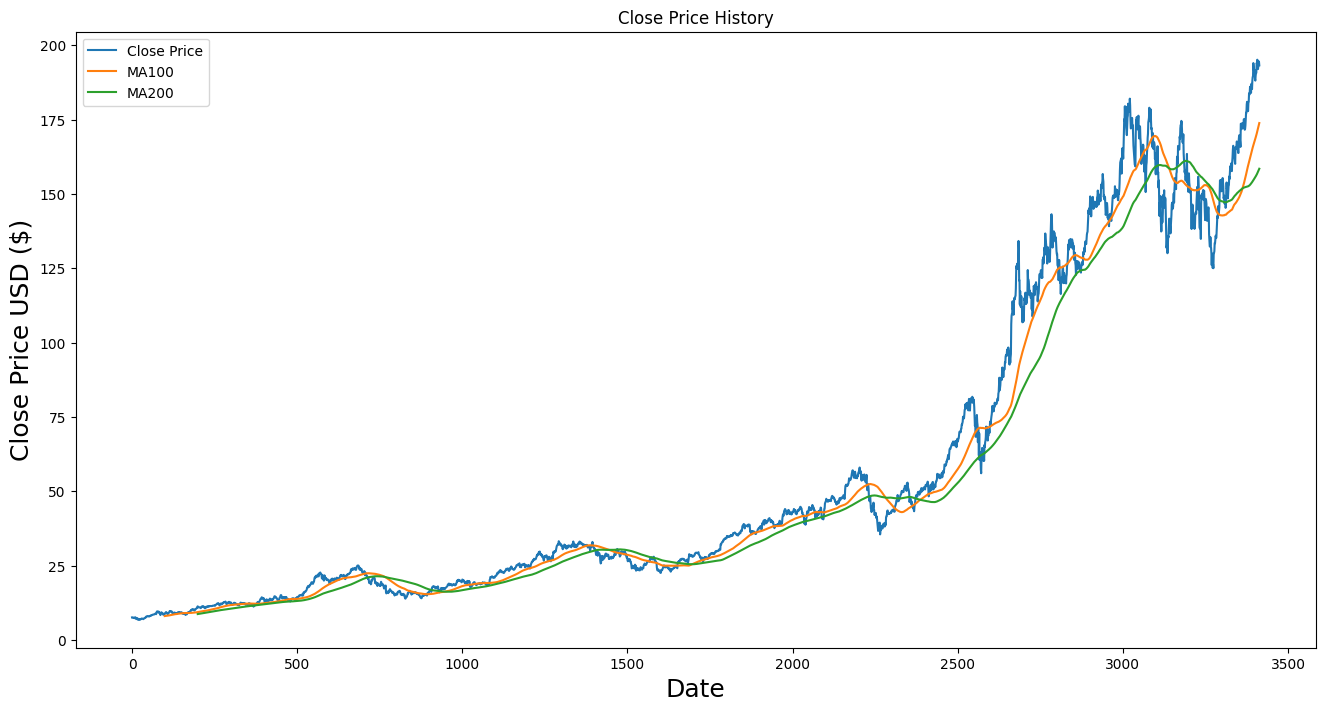

In [13]:
#matplotlib
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], label='Close Price')
plt.plot(ma100, label='MA100')
plt.plot(ma200, label='MA200')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()


In [14]:
df.shape

(3414, 6)

A training and test data set is being formed with training set being 70% of the data and test data size is about 30% of the data.
Only Close price is considered for the prediction.

In [15]:
data_training = pd.DataFrame(df[['Date', 'Close']] [0 : int(len(df)*0.70)])
data_test = pd.DataFrame(df[['Date', 'Close']] [int(len(df)*0.70) : int(len(df))])


In [16]:
df[int(len(df)*0.70)-100:].head()

,Date,Open,High,Low,Close,Volume
2289,2019-02-07,43.099998,43.485001,42.584999,42.735001,126966800
2290,2019-02-08,42.247501,42.665001,42.105000,42.602501,95280000
2291,2019-02-11,42.762501,42.802502,42.312500,42.357498,83973600
2292,2019-02-12,42.525002,42.750000,42.424999,42.722500,89134000
2293,2019-02-13,42.847500,43.119999,42.480000,42.544998,89960800


In [17]:
data_test.head()

,Date,Close
2389,2019-07-02,50.682499
2390,2019-07-03,51.102501
2391,2019-07-05,51.057499
2392,2019-07-08,50.005001
2393,2019-07-09,50.310001


In [18]:
int(len(df)*0.70)

2389

In [19]:
temp_data_training = data_training.drop(['Date'], axis=1)
temp_data_test = data_test.drop(['Date'], axis=1)

In [20]:
data_test.head()

,Date,Close
2389,2019-07-02,50.682499
2390,2019-07-03,51.102501
2391,2019-07-05,51.057499
2392,2019-07-08,50.005001
2393,2019-07-09,50.310001


In [21]:
data_training.shape

(2389, 2)

In [22]:
data_training.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [23]:
temp_data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


Data that is being used to train the model is scaled with min value 0 and max value is 1. This is essential for algorithms that are sensitive to the scale of features, as it prevents some features from dominating others due to their larger magnitude.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(temp_data_training)

In [26]:
scale = scaler.scale_
scale

array([0.01954707])

In [27]:
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.84201083],
       [0.83311688],
       [0.85085587]])

In [28]:
data_training.shape

(2389, 2)

The model uses previous 100 days closing value to predict todays stock price. Two arrays are used x_train and y_train. x_train stores stock price for the last 100 days and y_train stores the price of todays price. x_train will be passed down to the deep learning model sequential with LSTM neural network which uses relu actvation function to predict todays stock price depending on the stock price of the last 100 days. y_train is also passed to the model for validation purpose.

In [29]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])


In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [32]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [34]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
72/72 [==============================] - 33s 273ms/step - loss: 0.0311
Epoch 2/25
72/72 [==============================] - 29s 404ms/step - loss: 0.0083
Epoch 3/25
72/72 [==============================] - 28s 392ms/step - loss: 0.0064
Epoch 4/25
72/72 [==============================] - 30s 414ms/step - loss: 0.0057
Epoch 5/25
72/72 [==============================] - 28s 386ms/step - loss: 0.0052
Epoch 6/25
72/72 [==============================] - 37s 507ms/step - loss: 0.0044
Epoch 7/25
72/72 [==============================] - 29s 401ms/step - loss: 0.0053
Epoch 8/25
72/72 [==============================] - 29s 401ms/step - loss: 0.0047
Epoch 9/25
72/72 [==============================] - 29s 409ms/step - loss: 0.0047
Epoch 10/25
72/72 [==============================] - 29s 407ms/step - loss: 0.0043
Epoch 11/25
72/72 [==============================] - 29s 399ms/step - loss: 0.0039
Epoch 12/25
72/72 [==============================] - 30s 418ms/step - loss: 0.0036
Epoch 13/25
7

In [35]:
model.save('stock_prediction.h5')

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [36]:
temp_data_test.head()

,Close
2389,50.682499
2390,51.102501
2391,51.057499
2392,50.005001
2393,50.310001


In [37]:
temp_data_training.tail(100)

,Close
2289,42.735001
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
...,...
2384,48.892502
2385,49.950001
2386,49.935001
2387,49.480000


In [38]:
len(temp_data_test)

1025

In [39]:
temp_data_test.head()

,Close
2389,50.682499
2390,51.102501
2391,51.057499
2392,50.005001
2393,50.310001


past 100 days data are gathered to predict the price of the stock on the first date of df_test set

In [40]:
past_100_days = temp_data_training.tail(100)




In [41]:
past_100_days.head()

,Close
2289,42.735001
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998


In [42]:
df_test = pd.concat([past_100_days, temp_data_test], ignore_index=True)

In [43]:
df_test.head()

,Close
0,42.735001
1,42.602501
2,42.357498
3,42.722500
4,42.544998


In [44]:
len(df_test)

1125

In [45]:
# Assuming 'df' and 'df_test' are your DataFrames

for index, row in df.iterrows():
    if row['Close'] == df_test['Close'][0]:
        print(index)


2289


In [46]:
df[2287:].head()

,Date,Open,High,Low,Close,Volume
2287,2019-02-05,43.215000,43.770000,43.087502,43.544998,144406400
2288,2019-02-06,43.662498,43.892502,43.212502,43.560001,112958400
2289,2019-02-07,43.099998,43.485001,42.584999,42.735001,126966800
2290,2019-02-08,42.247501,42.665001,42.105000,42.602501,95280000
2291,2019-02-11,42.762501,42.802502,42.312500,42.357498,83973600


In [47]:
df_test.head()

,Close
0,42.735001
1,42.602501
2,42.357498
3,42.722500
4,42.544998


In [48]:
data_test.head()

,Date,Close
2389,2019-07-02,50.682499
2390,2019-07-03,51.102501
2391,2019-07-05,51.057499
2392,2019-07-08,50.005001
2393,2019-07-09,50.310001


In [49]:
df_test_array = scaler.fit_transform(df_test)

In [50]:
df_test_array

array([[0.0024715 ],
       [0.00160402],
       [0.        ],
       ...,
       [0.99031042],
       [0.99607178],
       [0.98769167]])

In [51]:
x_test = []
y_test = []

for i in range(100, df_test.shape[0]):
    x_test.append(df_test_array[i-100 : i])
    y_test.append(df_test_array[i,0])
    
    

In [52]:
len(y_test)

1025

In [53]:
'y_test'

'y_test'

In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [55]:
y_test

array([0.0545035 , 0.05725324, 0.05695861, ..., 0.99031042, 0.99607178,
       0.98769167])

In [56]:
y_pred = model.predict(x_test)

33/33 [==============================] - 4s 92ms/step


In [57]:
len(y_pred)

1025

In [58]:
y_pred = np.array(y_pred)
y_pred

array([[0.09265709],
       [0.09285124],
       [0.09308396],
       ...,
       [0.86582834],
       [0.86749744],
       [0.8692782 ]], dtype=float32)

In [59]:
y_pred.shape

(1025, 1)

In [60]:
y_pred = y_pred.reshape(-1,1)
y_pred

array([[0.09265709],
       [0.09285124],
       [0.09308396],
       ...,
       [0.86582834],
       [0.86749744],
       [0.8692782 ]], dtype=float32)

In [61]:
y_test = y_test.reshape(-1,1)
y_test

array([[0.0545035 ],
       [0.05725324],
       [0.05695861],
       ...,
       [0.99031042],
       [0.99607178],
       [0.98769167]])

a new model named stock_prediction1.h5 is being trained for predicting data after 2019 as most of the stocks have showed drastic change after 2019

In [62]:
model.fit(x_test, y_test, epochs=25)
model.save('stock_prediction1.h5')

Epoch 1/25
33/33 [==============================] - 18s 298ms/step - loss: 0.0062
Epoch 2/25
33/33 [==============================] - 13s 380ms/step - loss: 0.0053
Epoch 3/25
33/33 [==============================] - 12s 367ms/step - loss: 0.0064
Epoch 4/25
33/33 [==============================] - 12s 362ms/step - loss: 0.0072
Epoch 5/25
33/33 [==============================] - 12s 369ms/step - loss: 0.0054
Epoch 6/25
33/33 [==============================] - 12s 364ms/step - loss: 0.0044
Epoch 7/25
33/33 [==============================] - 12s 369ms/step - loss: 0.0064
Epoch 8/25
33/33 [==============================] - 12s 370ms/step - loss: 0.0054
Epoch 9/25
33/33 [==============================] - 12s 377ms/step - loss: 0.0042
Epoch 10/25
33/33 [==============================] - 12s 366ms/step - loss: 0.0047
Epoch 11/25
33/33 [==============================] - 12s 378ms/step - loss: 0.0042
Epoch 12/25
33/33 [==============================] - 12s 372ms/step - loss: 0.0038
Epoch 13/25
3

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [63]:
# Perform the inverse transform on the 'y_pred' and 'y_test' arrays to get back to the original scale
original_y_pred = scaler.inverse_transform(y_pred)
original_y_test = scaler.inverse_transform(y_test)

In [64]:
original_y_pred

array([[ 56.510178],
       [ 56.53983 ],
       [ 56.575375],
       ...,
       [174.60628 ],
       [174.86124 ],
       [175.13322 ]], dtype=float32)

In [65]:
y_pred

array([[0.09265709],
       [0.09285124],
       [0.09308396],
       ...,
       [0.86582834],
       [0.86749744],
       [0.8692782 ]], dtype=float32)

In [66]:
data_test.shape

(1025, 2)

In [67]:
original_y_test

array([[ 50.68249893],
       [ 51.10250092],
       [ 51.05749893],
       ...,
       [193.61999512],
       [194.5       ],
       [193.22000122]])

In [68]:
data_test['y_pred'] = original_y_pred

In [69]:
y_test.shape

(1025, 1)

In [70]:
data_test['y_test'] = original_y_test

In [71]:
data_test.head()

,Date,Close,y_pred,y_test
2389,2019-07-02,50.682499,56.510178,50.682499
2390,2019-07-03,51.102501,56.539829,51.102501
2391,2019-07-05,51.057499,56.575375,51.057499
2392,2019-07-08,50.005001,56.616634,50.005001
2393,2019-07-09,50.310001,56.662609,50.310001


In [72]:
#plot y_pred vs y_test with date using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_test['Date'], y= data_test['y_test'], name='Actual Price'))
fig.add_trace(go.Scatter(x=data_test['Date'], y=data_test['y_pred'], name='Predicted Price'))
fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
fig.show()



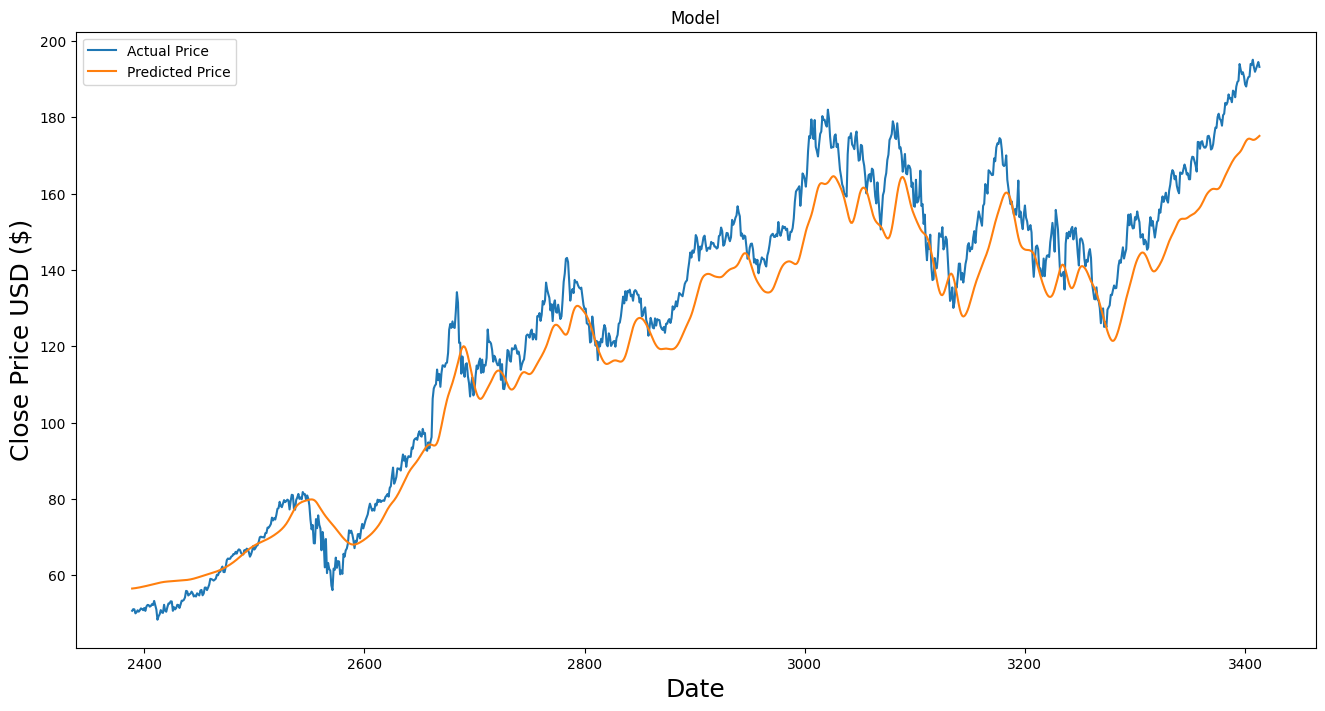

In [73]:
#matplotlib
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data_test[['y_test', 'y_pred']])
plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')
plt.show()


**Prophet model**

Prophet is a time series forecasting model developed by Facebook's Core Data Science team. It is designed to provide accurate and intuitive predictions for time series data with strong seasonality and multiple changepoints. It is being trained using the same data_training set that has been used for traing sequential model

In [74]:
model1 = Prophet()

In [75]:
data_training 

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
2384,2019-06-25,48.892502
2385,2019-06-26,49.950001
2386,2019-06-27,49.935001
2387,2019-06-28,49.480000


In [76]:
data_training = data_training[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

In [77]:
data_training

,ds,y
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
2384,2019-06-25,48.892502
2385,2019-06-26,49.950001
2386,2019-06-27,49.935001
2387,2019-06-28,49.480000


In [78]:
model1.fit(data_training) 

05:18:24 - cmdstanpy - INFO - Chain [1] start processing
05:18:26 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
#get year from start 
start_date = '2010-01-01'
start_year = date.datetime.strptime(start_date, '%Y-%m-%d').year

#get year from end
end_date = date.datetime.now().strftime('%Y-%m-%d')
end_year = date.datetime.strptime(end_date, '%Y-%m-%d').year
end_year

2023

In [80]:
number_years = end_year - start_year

In [81]:
number_years

13

For accuracy purpose we are only predicting 4 months into the future. Since LSTM donot have the ability to extrapolate

In [82]:
n_years = 4/12
n = n_years+4

In [85]:
#predict next n years = star_date 5

period = int(365*n)

 Prophet employs its make_future_dataframe() function, which creates a dataframe with dates extending into the future. The predict() function then utilizes this extended dataframe to forecast future values of the time series, including trend, seasonality, and uncertainty intervals.

In [86]:
future = model1.make_future_dataframe(periods=period)

In [87]:
future

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3965,2023-10-25
3966,2023-10-26
3967,2023-10-27
3968,2023-10-28


In [88]:
future.tail()

,ds
3965,2023-10-25
3966,2023-10-26
3967,2023-10-27
3968,2023-10-28
3969,2023-10-29


In [89]:
# Convert the string '2019-07-1' to a Timestamp object
target_date = pd.to_datetime('2019-07-01')

for i in range(len(future)):
    if future['ds'][i] == target_date or future['ds'][i] > target_date:
        print(i)
        break

2388


In [90]:
forcast = model1.predict(future)

In [91]:
#print df close price from df 
df_close = df[['Date', 'Close']]
df_close

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
3409,2023-07-21,191.940002
3410,2023-07-24,192.750000
3411,2023-07-25,193.619995
3412,2023-07-26,194.500000


In [92]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,7.688421,3.590994,9.164104,7.688421,7.688421,-1.500408,-1.500408,-1.500408,-0.001396,-0.001396,-0.001396,-1.499013,-1.499013,-1.499013,0.0,0.0,0.0,6.188013
1,2010-01-05,7.697921,3.370714,8.995575,7.697921,7.697921,-1.439460,-1.439460,-1.439460,0.054429,0.054429,0.054429,-1.493890,-1.493890,-1.493890,0.0,0.0,0.0,6.258460
2,2010-01-06,7.707420,3.422625,9.015335,7.707420,7.707420,-1.445322,-1.445322,-1.445322,0.043392,0.043392,0.043392,-1.488714,-1.488714,-1.488714,0.0,0.0,0.0,6.262098
3,2010-01-07,7.716919,3.562821,8.866816,7.716919,7.716919,-1.466946,-1.466946,-1.466946,0.017290,0.017290,0.017290,-1.484236,-1.484236,-1.484236,0.0,0.0,0.0,6.249973
4,2010-01-08,7.726418,3.602463,8.973975,7.726418,7.726418,-1.513439,-1.513439,-1.513439,-0.032300,-0.032300,-0.032300,-1.481139,-1.481139,-1.481139,0.0,0.0,0.0,6.212979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2023-10-25,72.124781,11.794763,132.320547,9.586746,130.726362,1.258349,1.258349,1.258349,0.043392,0.043392,0.043392,1.214956,1.214956,1.214956,0.0,0.0,0.0,73.383130
3966,2023-10-26,72.138725,10.516231,133.381668,9.532907,130.789609,1.239255,1.239255,1.239255,0.017290,0.017290,0.017290,1.221965,1.221965,1.221965,0.0,0.0,0.0,73.377980
3967,2023-10-27,72.152670,11.455564,133.346935,9.479069,130.852857,1.190095,1.190095,1.190095,-0.032300,-0.032300,-0.032300,1.222395,1.222395,1.222395,0.0,0.0,0.0,73.342765
3968,2023-10-28,72.166614,9.176858,132.527511,9.425230,130.916105,1.175078,1.175078,1.175078,-0.040708,-0.040708,-0.040708,1.215786,1.215786,1.215786,0.0,0.0,0.0,73.341692


In [93]:
forcast[['ds','yhat_upper']][2387:]

,ds,yhat_upper
2387,2019-06-28,52.308718
2388,2019-07-01,52.573421
2389,2019-07-02,52.459593
2390,2019-07-03,52.522797
2391,2019-07-04,52.626643
...,...,...
3965,2023-10-25,132.320547
3966,2023-10-26,133.381668
3967,2023-10-27,133.346935
3968,2023-10-28,132.527511


In [94]:
import pickle

# Specify the file path where you want to save the model
model_path = "prophet_model.pkl"

# Save the model to the specified file
with open(model_path, "wb") as file:
    pickle.dump(model1, file)


In [95]:
#plot y_pred vs y_test with date using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=forcast['ds'][2387:], y= forcast['yhat_upper'][2387:], name='Prophet Predictions'))
fig.add_trace(go.Scatter(x=data_test['Date'], y=data_test['y_pred'], name='LSTM Predictions'))
fig.add_trace(go.Scatter(x=data_test['Date'], y= data_test['y_test'], name='Actual Price'))
fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
fig.show()


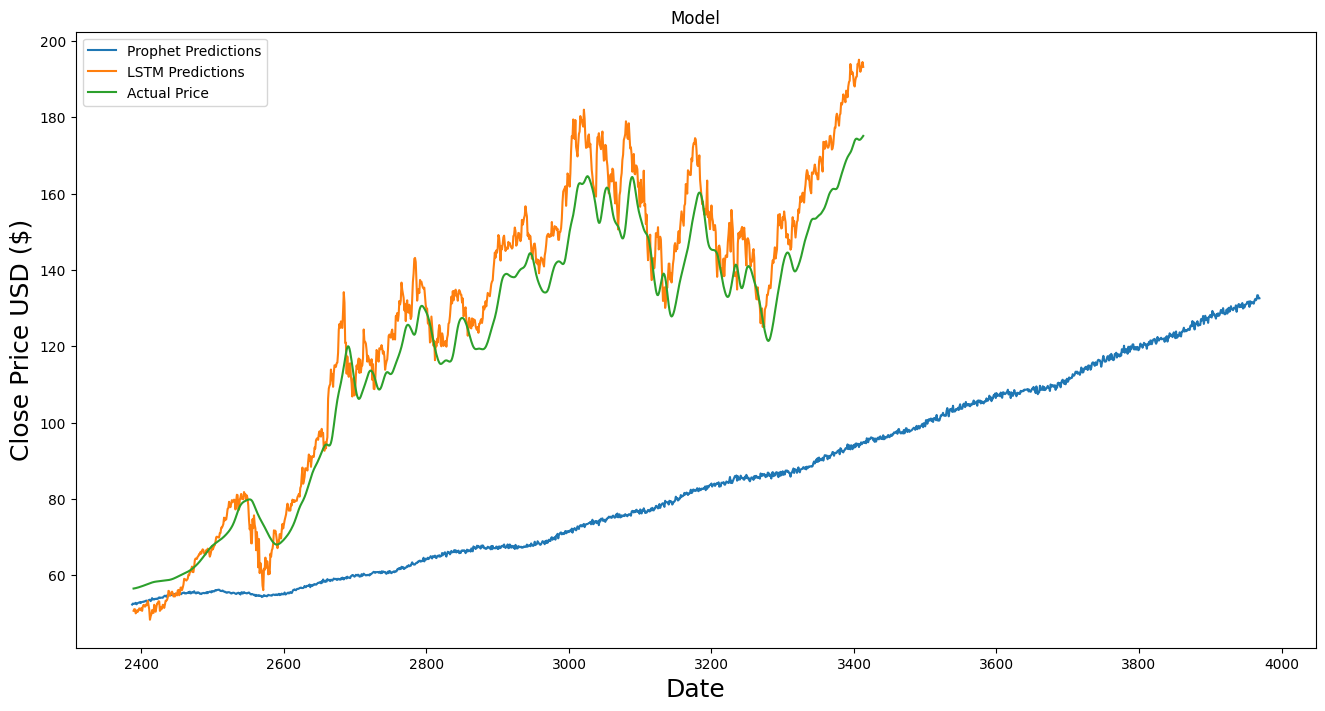

In [96]:
#matplotlib
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(forcast['yhat_upper'][2387:], label='Prophet Predictions')
plt.plot(data_test[['y_test', 'y_pred']], label='LSTM Predictions')
plt.legend(['Prophet Predictions', 'LSTM Predictions', 'Actual Price'], loc='upper left')
plt.show()


In [97]:
fig1 = plot_plotly(model1, forcast)
fig1.show()

The future dataframe made using make_future_dataframe() is appended with data frame which will be used to predict future data using sequential model. Sequential model is being used to predict the entire dataset collected from yahoo data frame having data till this date. This set is done before appending the future data with dataframe. 


In [101]:
temp_df = df

In [102]:
temp_df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
3409,2023-07-21,194.100006,194.970001,191.229996,191.940002,71917800
3410,2023-07-24,193.410004,194.910004,192.250000,192.750000,45377800
3411,2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200
3412,2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900


In [103]:
tempo_df = temp_df.copy()
tempo_df.drop(['Open', 'High', 'Low', 'Date', 'Volume'], axis=1, inplace=True)

In [104]:
tempo_df = scaler.fit_transform(tempo_df)

In [105]:
tempo_df.shape

(3414, 1)

In [106]:
x_df= []
y_df = []

for i in range(100, temp_df.shape[0]):
    x_df.append(tempo_df[i-100 : i])
    y_df.append(tempo_df[i,0])

In [107]:
len(x_df)

3314

In [108]:
len(y_df)

3314

In [109]:
temp_df.shape

(3414, 6)

In [110]:
#83
x_df, y_df = np.array(x_df), np.array(y_df)

In [111]:
x_df.shape

(3314, 100, 1)

In [112]:
y_df.shape

(3314,)

In [113]:
y_df_pred = model.predict(x_df)

104/104 [==============================] - 11s 107ms/step


In [114]:
y_df_pred.shape

(3314, 1)

In [115]:
# Perform the inverse transform on the 'y_pred' and 'y_test' arrays to get back to the original scale
original_y_df_pred = scaler.inverse_transform(y_df_pred)

In [116]:
original_y_df_pred

array([[ 18.862083],
       [ 18.870808],
       [ 18.878403],
       ...,
       [171.44263 ],
       [171.63618 ],
       [171.67488 ]], dtype=float32)

In [117]:
original_y_df = scaler.inverse_transform(y_df.reshape(-1,1))

In [118]:
original_y_df

array([[  9.04821396],
       [  9.17428589],
       [  9.31535721],
       ...,
       [193.61999512],
       [194.5       ],
       [193.22000122]])

In [119]:
len(temp_df)

3414

In [120]:
for i, row in temp_df.iterrows():
    if i >= 100:
        temp_df.loc[i, 'y_pred'] = original_y_df_pred[i-100]
    else:
        temp_df.loc[i, 'y_pred'] = 0


In [121]:
for i, row in temp_df.iterrows():
    if i >= 100:
        temp_df.loc[i, 'y_org'] = original_y_df[i-100]
    else:
        temp_df.loc[i, 'y_org'] = temp_df.loc[i, 'Close']


In [122]:
temp_df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3409,2023-07-21,194.100006,194.970001,191.229996,191.940002,71917800,170.346893,191.940002
3410,2023-07-24,193.410004,194.910004,192.250000,192.750000,45377800,171.012695,192.750000
3411,2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200,171.442627,193.619995
3412,2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900,171.636185,194.500000
3413,2023-07-27,196.020004,197.199997,192.559998,193.220001,45363655,171.674881,193.220001


In [123]:
len(temp_df)

3414

In [124]:
temp_df['Date'][len(temp_df)-1]

Timestamp('2023-07-27 00:00:00')

In [125]:
n 

4.333333333333333

In [126]:
future

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3965,2023-10-25
3966,2023-10-26
3967,2023-10-27
3968,2023-10-28


In [127]:
#find the index of future where future['ds'] == temp_df['Date'][len(temp_df)-1]
for i in range(len(future)):
    if future['ds'][i] == temp_df['Date'][len(temp_df)-1]:
        index = i 
        print(index)
        break


3875


In [128]:
index

3875

Since we are using past 100 days to predict todays stock value so we cannot predict stock of first 100 days. we have set them to 0.

In [129]:
df[:index].head()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600,0.0,7.643214
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800,0.0,7.656429
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000,0.0,7.534643
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200,0.0,7.520714
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800,0.0,7.570714


In [130]:
df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3409,2023-07-21,194.100006,194.970001,191.229996,191.940002,71917800,170.346893,191.940002
3410,2023-07-24,193.410004,194.910004,192.250000,192.750000,45377800,171.012695,192.750000
3411,2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200,171.442627,193.619995
3412,2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900,171.636185,194.500000
3413,2023-07-27,196.020004,197.199997,192.559998,193.220001,45363655,171.674881,193.220001


In [131]:
len(future)

3970

In [132]:
future['ds'][index]

Timestamp('2023-07-27 00:00:00')

In [133]:
#append future from index to len(future) to temp_df
temp_df = pd.concat([temp_df, future.iloc[index+1:]], ignore_index=True)

In [134]:

def update_date(temp_df):
    temp_df_copy = temp_df.copy()
    for i in range(len(temp_df_copy)):
        if pd.isna(temp_df_copy['Date'][i]):
            temp_df_copy.loc[i, 'Date'] = temp_df_copy['ds'][i]
        elif pd.isna(temp_df_copy['ds'][i]):
            temp_df_copy.loc[i, 'ds'] = temp_df_copy['Date'][i]
    return temp_df_copy

temp_df = update_date(temp_df)

In [135]:
temp_df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org,ds
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-25
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-26
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-27
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-28
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-29


In [136]:
temp_df.drop(['ds'], axis=1, inplace=True)

In [137]:
temp_df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
temp_df.head()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600.0,0.0,7.643214
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800.0,0.0,7.656429
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000.0,0.0,7.534643
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200.0,0.0,7.520714
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800.0,0.0,7.570714


In [139]:
temp_df.shape

(3508, 8)

In [140]:
#make a copy of temp_df
temp_df_copy = temp_df.copy()

temp_df_Copy_close a dataframe is created to store all the actual close value before they are droped.

In [141]:
temp_df_copy_Close = temp_df_copy['Close'].copy()

In [142]:
temp_df_copy.shape

(3508, 8)

In [143]:
temp_df_copy.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


temp_df_copy has only the prediction value

In [144]:
#drop 'Date' column from temp_df_copy
temp_df_copy.drop(['Date','Close','y_org','Open',"High",'Low','Volume'], axis=1, inplace=True)


In [145]:
#scale temp_df_copy
temp_df_copy = scaler.fit_transform(temp_df_copy)
temp_df_copy_Close = scaler.fit_transform(temp_df_copy_Close.values.reshape(-1,1))


In [146]:
temp_df_copy

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [nan],
       [nan],
       [nan]])

In [147]:
temp_df_copy_Close

array([[0.00416639],
       [0.00423659],
       [0.00358962],
       ...,
       [       nan],
       [       nan],
       [       nan]])

In [148]:
end_date

'2023-07-28'

In [149]:
#find the last index where temp_df_copy["close"] is not null
for i in range(len(temp_df_copy)):
    if pd.isna(temp_df_copy[i][0]):
        index = i
        print(index)
        break



3414


In [150]:
index

3414

In [151]:
#find value at index
temp_df_copy[index-1]

array([1.])

In [152]:
len(temp_df_copy)

3508

In [153]:
temp_df_copy_Close

array([[0.00416639],
       [0.00423659],
       [0.00358962],
       ...,
       [       nan],
       [       nan],
       [       nan]])

Since we dont have stock value of future data so we are not being able to use any existing data to validate the data. we have two arrays x_future . x_future is appending last 300 days value from today's date to predict tomorrows stock data which is appended to temp_df_copy which has the predicting data pf previous days. 

In [154]:
x_future = []


"""
for i in range(index-1, len(temp_df_copy)-1):
    x_future.append(temp_df_copy[i-300 : i])
    x_future = np.array(x_future)
    y_prediction = model.predict(x_future)
    y_future.append(temp_df_copy[i,0])
    temp_df_copy[i+1][0] = y_prediction
    x_future = []
"""

for i in range(index-1, len(temp_df_copy)-1):
    x_future.append(temp_df_copy_Close[i-300 : i])
    x_future = np.array(x_future)
    y_prediction = model.predict(x_future)
    temp_df_copy[i+1][0] = y_prediction
    temp_df_copy_Close[i+1][0] = y_prediction
    x_future = []


1/1 [==============================] - 0s 232ms/step


In [155]:
#convert temp_df_copy to dataframe
temp_df_copy = pd.DataFrame(temp_df_copy, columns=['y_pred' ])

In [156]:
temp_df_copy

,y_pred
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
3503,0.498320
3504,0.497997
3505,0.497683
3506,0.497378


In [157]:
index

3414

In [158]:
temp_df_copy.shape

(3508, 1)

In [159]:
#inverse transform temp_df_copy
temp_df_copy = scaler.inverse_transform(temp_df_copy)


In [160]:
temp_df_copy

array([[  6.85892916],
       [  6.85892916],
       [  6.85892916],
       ...,
       [100.54327726],
       [100.48585308],
       [100.42997727]])

In [161]:
#convert temp_df_copy to dataframe
temp_df_copy = pd.DataFrame(temp_df_copy, columns=['y_pred' ])

In [162]:
temp_df_copy['Date'] = temp_df['Date'].values

In [163]:
temp_df_copy

,y_pred,Date
0,6.858929,2010-01-04
1,6.858929,2010-01-05
2,6.858929,2010-01-06
3,6.858929,2010-01-07
4,6.858929,2010-01-08
...,...,...
3503,100.663130,2023-10-25
3504,100.602362,2023-10-26
3505,100.543277,2023-10-27
3506,100.485853,2023-10-28


In [164]:
#change order of columns
temp_df_copy = temp_df_copy[['Date', 'y_pred']]
temp_df_copy

,Date,y_pred
0,2010-01-04,6.858929
1,2010-01-05,6.858929
2,2010-01-06,6.858929
3,2010-01-07,6.858929
4,2010-01-08,6.858929
...,...,...
3503,2023-10-25,100.663130
3504,2023-10-26,100.602362
3505,2023-10-27,100.543277
3506,2023-10-28,100.485853


In [165]:
index

3414

In [166]:
temp_df.head()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600.0,0.0,7.643214
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800.0,0.0,7.656429
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000.0,0.0,7.534643
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200.0,0.0,7.520714
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800.0,0.0,7.570714


In [167]:
temp_df[:index].tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3409,2023-07-21,194.100006,194.970001,191.229996,191.940002,71917800.0,170.346893,191.940002
3410,2023-07-24,193.410004,194.910004,192.250000,192.750000,45377800.0,171.012695,192.750000
3411,2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200.0,171.442627,193.619995
3412,2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900.0,171.636185,194.500000
3413,2023-07-27,196.020004,197.199997,192.559998,193.220001,45363655.0,171.674881,193.220001


In [168]:
temp_df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
temp_df_copy.tail()

,Date,y_pred
3503,2023-10-25,100.663130
3504,2023-10-26,100.602362
3505,2023-10-27,100.543277
3506,2023-10-28,100.485853
3507,2023-10-29,100.429977


In [170]:
temp_df.shape

(3508, 8)

In [171]:
temp_df_copy.tail()

,Date,y_pred
3503,2023-10-25,100.663130
3504,2023-10-26,100.602362
3505,2023-10-27,100.543277
3506,2023-10-28,100.485853
3507,2023-10-29,100.429977


In [172]:
for i in range(index, len(temp_df)):
    temp_df.loc[i, 'y_pred'] = temp_df_copy.loc[i, 'y_pred']

In [173]:
temp_df.tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,100.663130,NaN
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,100.602362,NaN
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,100.543277,NaN
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,100.485853,NaN
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,100.429977,NaN


In [174]:
index

3414

In [175]:
temp_df[index+1:].tail()

,Date,Open,High,Low,Close,Volume,y_pred,y_org
3503,2023-10-25,NaN,NaN,NaN,NaN,NaN,100.663130,NaN
3504,2023-10-26,NaN,NaN,NaN,NaN,NaN,100.602362,NaN
3505,2023-10-27,NaN,NaN,NaN,NaN,NaN,100.543277,NaN
3506,2023-10-28,NaN,NaN,NaN,NaN,NaN,100.485853,NaN
3507,2023-10-29,NaN,NaN,NaN,NaN,NaN,100.429977,NaN


In [176]:
#remove duplicate date entries from temp_df
temp_df.drop_duplicates(subset='Date', keep='first', inplace=True)

In [177]:
#save temp_df to csv
#temp_df.to_csv('stock_prediction2.csv')


In [178]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forcast['ds'], y= forcast['yhat_upper'], name='Prophet Predictions'))
fig.add_trace(go.Scatter(x=temp_df['Date'], y=temp_df['y_pred'], name='LSTM Predictions'))
fig.add_trace(go.Scatter(x=temp_df['Date'][:index], y= temp_df['Close'], name='Actual Price'))
fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
fig.show()


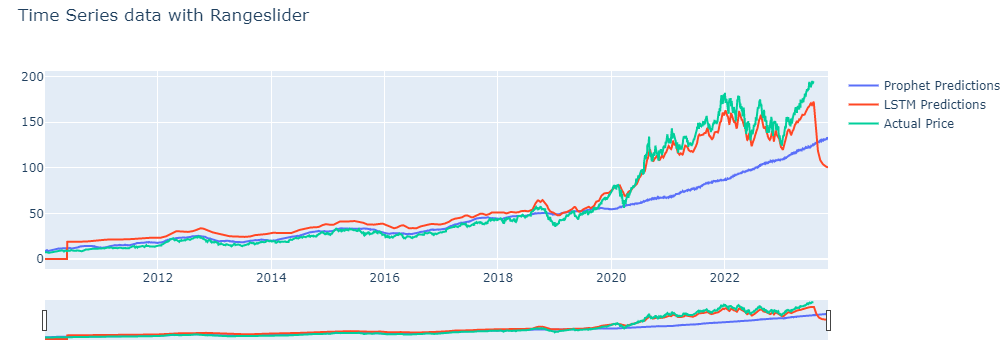